<a href="https://colab.research.google.com/github/sajeebju/Seismic-Lab/blob/main/Exercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - 7

A) Assume a boundary between two beds, which dips at an angle of 5 0 . The seismic
velocity above the interface is 1 km/s and that below it is 2.5 km/s. The perpendicular
distance from the shot to the interface at the end of the profile at which shooting made
downdip is 0.25 km.

Calculate the arrival times for direct wave, reflected wave, and refracted wave if the
recording is conducted at an interval of 0.1 km in the range of 1.5 km from the shot
point.
Plot a few ray-path trajectories and show the timedistance relations for the waves. Find
out the critical distance (Xcrit) and the crossover distance (Xcross) from the diagram.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

direct_arr = []
reflection_arr = []
refraction_arr = []

def direct_wave(x_start, x_end, v):
  for i in np.arange(x_start, x_end + 0.1, 0.1):
    t = i / v
    direct_arr.append(round(t, 3))
  return direct_arr
    

def reflection_wave(x_start, x_end, h, theta, v):
  for i in np.arange(x_start, x_end + 0.1, 0.1):
    t = 1/v * (np.sqrt(i**2 + 4*h**2 + 4*h*i*np.sin((np.radians(theta)))))
    reflection_arr.append(round(t, 3))
  return reflection_arr
    

def refraction_wave(x_start, x_end, h,theta, theta_c, v):
  for i in np.arange(x_start, x_end + 0.1, 0.1):
    t = (2*h*np.cos(np.radians(theta_c))) / v + (i*np.sin(np.radians(theta_c + theta)))/v
    refraction_arr.append(round(t, 3))
  return refraction_arr
    

v = 1
v1 = 2.5
theta_c = np.degrees(np.arcsin(v/v1))
x_start = 0
x_end = 1.5
h = 0.25
theta = 5

reflection_time = reflection_wave(x_start, x_end, h, theta, v)
refraction_time = refraction_wave(x_start, x_end, h, theta, theta_c,v)
direct_time = direct_wave(x_start, x_end, v)


In [18]:
print("Reflection time = ", reflection_time)
print("Refraction time = ", refraction_time)
print("Direct wave time = ", direct_time)


Reflection time =  [0.5, 0.518, 0.554, 0.605, 0.667, 0.737, 0.814, 0.895, 0.98, 1.067, 1.156, 1.247, 1.34, 1.433, 1.527, 1.622]
Refraction time =  [0.458, 0.506, 0.554, 0.602, 0.65, 0.697, 0.745, 0.793, 0.841, 0.889, 0.937, 0.984, 1.032, 1.08, 1.128, 1.176]
Direct wave time =  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]


In [19]:
# Incomplete code for plotting ray path

# x_range = np.arange(0, 1.5 + 0.1, 0.1)
# plt.figure(figsize = (12, 14))
# plt.plot(x_range, direct_time)
# plt.plot(x_range, reflection_time)
# plt.plot(x_range, refraction_time)

# x1, y1  = (0, 0)
# angle_1 = 265
# length_1 = 0.5

# endy_1 = y1 + length_1 * math.sin(math.radians(angle_1))
# endx_1 = length_1 * math.cos(math.radians(angle_1))
# plt.plot([x1, endx_1], [y1, endy_1])

# x, y = (-0.015, -0.25)
# angle = 355
# length = 1.5

# endy = y + length * math.sin(math.radians(angle))
# endx = length * math.cos(math.radians(angle))
# plt.plot([x, endx], [y, endy])

# a1 = -0.001
# b1 = -0.5

# b2 = -0.04
# for i in np.arange(0.1, 1.5+0.1, 0.1):
#   plt.plot([i, b2], [a1, b1])

# plt.xlabel("Distance-km")
# plt.ylabel("Time-s")
# plt.grid(True)
# plt.xlim(-0.4, 1.6)
# plt.ylim(-0.8, 1.8)
# plt.show()

B) The travel time data for a reflected wave are given in the following table.

In [ ]:
import pandas as pd
import numpy as np

X_meter_pos = np.array([0, 200, 400, 600, 800, 1000])
t_sec_pos = np.array([0.5, 0.53, 0.60, 0.70, 0.83, 0.97])
X_meter_neg = np.array([np.nan, -200, -400, -600, -800, -1000])
t_sec_neg = np.array([np.nan,0.53, 0.60, 0.70, 0.83, 0.97])

df = pd.DataFrame({"X_pos(meter)" : X_meter_pos, "t_p(s)" : t_sec_pos, "X_neg(meter)"  : X_meter_neg, "t_n(s)" :t_sec_neg})
df

,X_pos(meter),t_p(s),X_neg(meter),t_n(s)
0,0,0.50,NaN,NaN
1,200,0.53,-200.0,0.53
2,400,0.60,-400.0,0.60
3,600,0.70,-600.0,0.70
4,800,0.83,-800.0,0.83
5,1000,0.97,-1000.0,0.97


Find out the angle of dip () of the reflecting interface and determine the velocity of the
medium above the interface (v0 ) (assumed to be constant) and the perpendicular
distance (h) from the shot to the interface.

From the velocity value found above, what rock type you would expect to encounter in
a drill hole for the top layer?

In [ ]:
#Data conversion
# X meter to km scale
# x to x^2 


x_square_m = np.power(df["X_pos(meter)"], 2)
x_square_km = x_square_m * 10**(-6)
x_square_km = x_square_km
time_square = np.power(df["t_p(s)"], 2) 

df_b = pd.DataFrame({"x_square_m" : x_square_m, "x_square_km" : x_square_km, "time_square" : time_square})
df_b

,x_square_m,x_square_km,time_square
0,0,0.00,0.2500
1,40000,0.04,0.2809
2,160000,0.16,0.3600
3,360000,0.36,0.4900
4,640000,0.64,0.6889
5,1000000,1.00,0.9409


In [ ]:
def get_slope(y2, y1, x2, x1):
  m = (y2 - y1) / (x2 - x1)
  return m

y1 = df_b.iloc[2]["time_square"]
y2 = df_b.iloc[3]["time_square"]

x1 = df_b.iloc[2]["x_square_km"]
x2 = df_b.iloc[3]["x_square_km"]

slope = get_slope(y2, y1, x2, x1)

# As we know, slope = 1 / v^2

v = np.sqrt(1 / slope)

print("Velocity : {:.2f} km/s".format(v))


Velocity : 1.24 km/s


In [ ]:
# Depth,  h = v * t_0 / 2

t_0 = df.iloc[0, 1]
h = v * t_0 / 2

print("Depth = {:.2f} km".format(h))

Depth = 0.31 km


In [ ]:
#Plotting hyperbolic curve
xs = []
for i in np.arange(-1000, 1200, 200):
  xs.append(i)
 

[-1000, -800, -600, -400, -200, 0, 200, 400, 600, 800, 1000]

In [ ]:
t1 = df["t_n(s)"].to_numpy()
t2 = df["t_p(s)"].to_numpy()[::-1]
t1 = t1[np.logical_not(np.isnan(t1))]
t1

array([0.53, 0.6 , 0.7 , 0.83, 0.97])

In [ ]:
t2

array([0.97, 0.83, 0.7 , 0.6 , 0.53, 0.5 ])

In [ ]:
t3 = np.concatenate((t2, t1), axis = 0)
t3

array([0.97, 0.83, 0.7 , 0.6 , 0.53, 0.5 , 0.53, 0.6 , 0.7 , 0.83, 0.97])

In [ ]:
xt = [-1000, -500, 0, 0, 500, 1000]
yt = [0, -0.2, 0, 0, -0.2, 0]

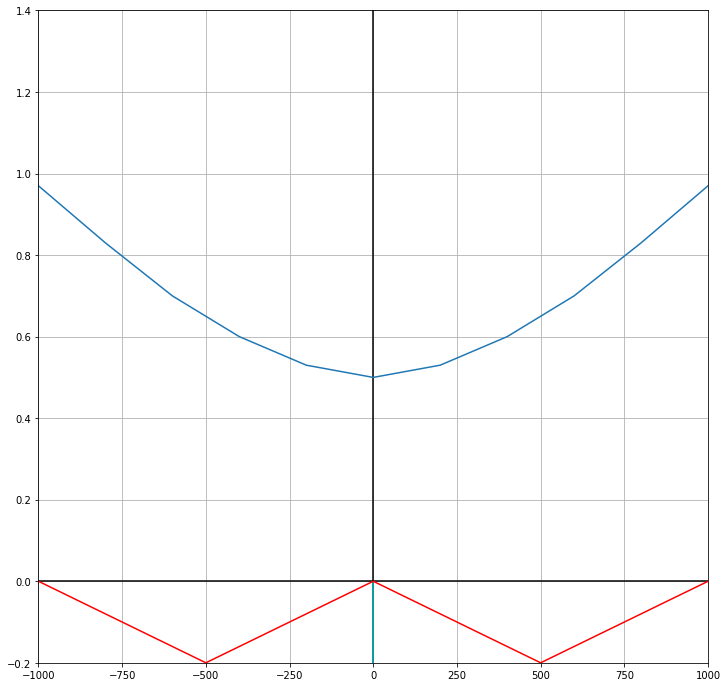

In [ ]:
plt.figure(figsize = (12, 12))
plt.plot(xs, t3)
plt.plot(xt, yt, color = "red")
plt.plot()
plt.vlines(0, -0.2, 1.4, colors = "k")
plt.vlines(0, -0.2, 0, colors = "c")
plt.hlines(0, -1000, 1000, colors = "k")
plt.xlim(-1000, 1000)
plt.ylim(-0.2, 1.4)
plt.grid(True)